<a href="https://colab.research.google.com/github/sagihaider/Biogas_Prediction/blob/master/Relieff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/Biogas_Prediction.git 

Cloning into 'Biogas_Prediction'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 143 (delta 35), reused 104 (delta 16), pack-reused 0
Receiving objects: 100% (143/143), 21.12 MiB | 28.02 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.multioutput import RegressorChain
from numpy import mean, std, absolute
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/content/Biogas_Prediction/Data/Gasification Data_Daya.xlsx', index_col=0, header=0)
data = data.iloc[1:223,:14] 
display(list(data.columns.values))

# Drop null balues and store dataframe in dataframe 2
data=data.dropna()
print(data)

#Check Null values again after removing
print(data.isnull().values.any())
print(data.isna().values.any())

['C [%wt db]',
 'H [%wt db]',
 'O [%wt db]',
 'Moisture [%wt]',
 'Ash [%wt db]',
 'ER [-]',
 'T [ºC]',
 'Bed material',
 'Steam/Biomass',
 'H2 [%vol N2 free]',
 'CO [%vol N2 free]',
 'CO2 [%vol N2 free]',
 'CH4 [%vol N2 free]',
 'GY [Nm3/kg daf]']

        C [%wt db] H [%wt db]  ...  CH4 [%vol N2 free] GY [Nm3/kg daf]
Sr No.                         ...                                    
2            50.00        5.7  ...            6.474820        2.500000
3            50.00        5.7  ...            7.164179        2.500000
4            50.00        5.7  ...            6.474820        2.100000
5            50.00        5.7  ...            6.474820        2.400000
6            50.00        5.7  ...            8.181818        2.100000
...            ...        ...  ...                 ...             ...
219          46.85        6.3  ...            9.706147        0.947532
220          46.85        6.3  ...            9.455065        0.975752
221          46.76       5.68  ...            9.933682        0.971784
222          46.76       5.68  ...            8.778402        0.982989
223          46.76       5.68  ...            8.534014        0.973816

[187 rows x 14 columns]
False
False


In [4]:
X = data.iloc[:, :9]
y = data.iloc[:, 9:]

input_columns = list(X.columns.values)
output_columns = list(y.columns.values)

print(input_columns, output_columns)

['C [%wt db]', 'H [%wt db]', 'O [%wt db]', 'Moisture [%wt]', 'Ash [%wt db]', 'ER [-]', 'T [ºC]', 'Bed material', 'Steam/Biomass'] ['H2 [%vol N2 free]', 'CO [%vol N2 free]', 'CO2 [%vol N2 free]', 'CH4 [%vol N2 free]', 'GY [Nm3/kg daf]']


In [5]:
!pip install ReliefF

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-cp36-none-any.whl size=6305 sha256=b75e7688549242a4f969f5c1abb100a398ede022ed5030690cf43c10adf53902
  Stored in directory: /root/.cache/pip/wheels/1c/9e/51/59ca638520794c9e0155d592b9f8c579f80cc29cbaf1de0f45
Successfully built ReliefF


## Below code cell is used for ReliefF Algorithm
#### For SIMO we have used a for loop to test each target variable at a time.

In [40]:
import numpy as np
import pandas as pd
from ReliefF import ReliefF

# #example of 2 class problem
data = np.array(X)
for x in range(5):
  target = np.array(y.iloc[:, x])
  fs = ReliefF(n_neighbors=1, n_features_to_keep=3)
  X_train = fs.fit_transform(data, target)
  # print(X_train)
  print("--------------")
  print("(No. of tuples, No. of Columns before ReliefF) : "+str(data.shape)+
      "\n(No. of tuples , No. of Columns after ReliefF) : "+str(X_train.shape))


--------------
(No. of tuples, No. of Columns before ReliefF) : (187, 9)
(No. of tuples , No. of Columns after ReliefF) : (187, 3)
--------------
(No. of tuples, No. of Columns before ReliefF) : (187, 9)
(No. of tuples , No. of Columns after ReliefF) : (187, 3)
--------------
(No. of tuples, No. of Columns before ReliefF) : (187, 9)
(No. of tuples , No. of Columns after ReliefF) : (187, 3)
--------------
(No. of tuples, No. of Columns before ReliefF) : (187, 9)
(No. of tuples , No. of Columns after ReliefF) : (187, 3)
--------------
(No. of tuples, No. of Columns before ReliefF) : (187, 9)
(No. of tuples , No. of Columns after ReliefF) : (187, 3)


## Below code cell is used for Correlation Feature Selection Algorithm
#### For SIMO we have used a for loop to test each target variable at a time

Feature 0: 54.673138
Feature 1: 102.322463
Feature 2: 51.699409
Feature 3: 32.176482
Feature 4: 1.518533
Feature 5: 31.577098
Feature 6: 7.571369
Feature 7: 0.036071
Feature 8: 14.299048


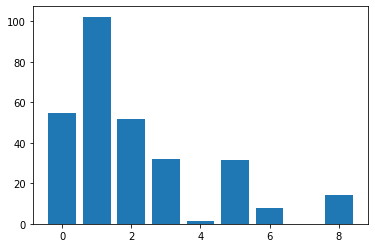

Feature 0: 1.922219
Feature 1: 0.364708
Feature 2: 52.804732
Feature 3: 1.760275
Feature 4: 48.459534
Feature 5: 1.012559
Feature 6: 2.788851
Feature 7: 4.080523
Feature 8: 8.360658


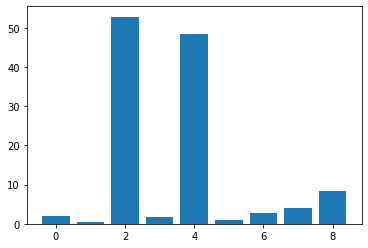

Feature 0: 88.501293
Feature 1: 147.315786
Feature 2: 21.841204
Feature 3: 35.445158
Feature 4: 16.396447
Feature 5: 55.348294
Feature 6: 7.759506
Feature 7: 3.003959
Feature 8: 23.836093


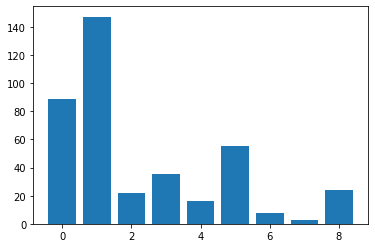

Feature 0: 23.082367
Feature 1: 23.275475
Feature 2: 11.209295
Feature 3: 21.768911
Feature 4: 3.153922
Feature 5: 5.557374
Feature 6: 13.704713
Feature 7: 6.513146
Feature 8: 3.960414


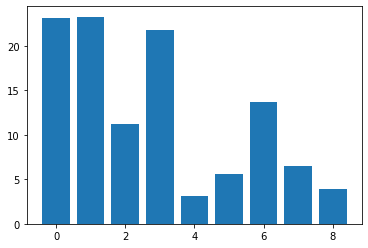

Feature 0: 70.129646
Feature 1: 120.541395
Feature 2: 169.713876
Feature 3: 30.962179
Feature 4: 0.518993
Feature 5: 11.701944
Feature 6: 54.565222
Feature 7: 5.286430
Feature 8: 0.037343


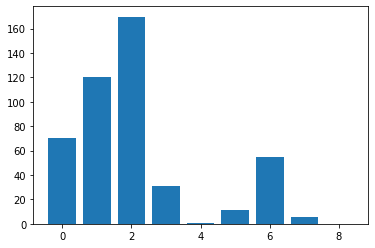

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# #example of 2 class problem
data = np.array(X)
for x in range(5):
  target = np.array(y.iloc[:, x])

  # configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(data, target)
  # transform train input data
  X_train_fs = fs.transform(data)

  # what are scores for the features
  for i in range(len(fs.scores_)):
	  print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  # pyplot.xlabel(rotation=90)
  pyplot.show()

## Mutual Information Feature Selection
#### For SIMO we have used a for loop to test each target variable at a time 

Feature 0: 0.568151
Feature 1: 0.646006
Feature 2: 0.656209
Feature 3: 0.465955
Feature 4: 0.506337
Feature 5: 0.192119
Feature 6: 0.339546
Feature 7: 0.323817
Feature 8: 0.232475


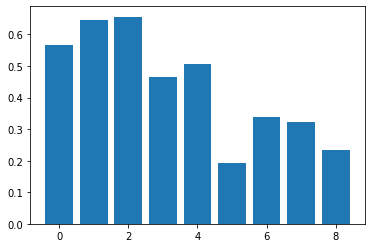

Feature 0: 0.564326
Feature 1: 0.564838
Feature 2: 0.652715
Feature 3: 0.527481
Feature 4: 0.392989
Feature 5: 0.122897
Feature 6: 0.243870
Feature 7: 0.165482
Feature 8: 0.197801


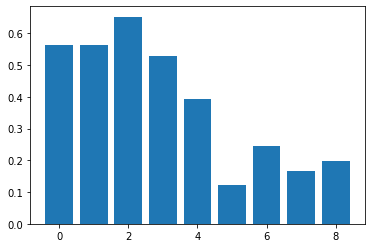

Feature 0: 0.679950
Feature 1: 0.788011
Feature 2: 0.761326
Feature 3: 0.501883
Feature 4: 0.329910
Feature 5: 0.372098
Feature 6: 0.270223
Feature 7: 0.241060
Feature 8: 0.281520


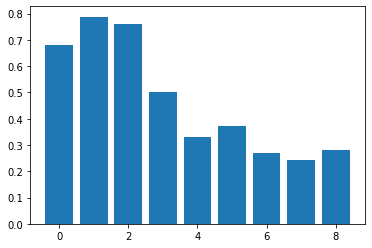

Feature 0: 0.755442
Feature 1: 0.668516
Feature 2: 0.688244
Feature 3: 0.768232
Feature 4: 0.450848
Feature 5: 0.197192
Feature 6: 0.252711
Feature 7: 0.488496
Feature 8: 0.123570


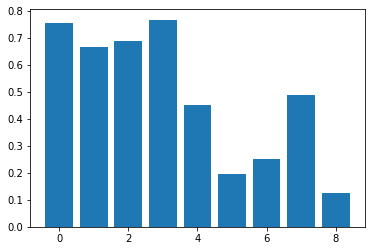

Feature 0: 0.560956
Feature 1: 0.606563
Feature 2: 0.555234
Feature 3: 0.470407
Feature 4: 0.270530
Feature 5: 0.392849
Feature 6: 0.352661
Feature 7: 0.200878
Feature 8: 0.079645


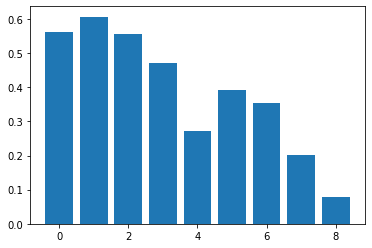

In [45]:
# #example of 2 class problem
from sklearn.feature_selection import mutual_info_regression

data = np.array(X)
for x in range(5):
  target = np.array(y.iloc[:, x])

  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_regression, k='all')
  # learn relationship from training data
  fs.fit(data, target)
  # transform train input data
  X_train_fs = fs.transform(data)

  # what are scores for the features
  for i in range(len(fs.scores_)):
	  print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
  pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
  # pyplot.xlabel(rotation=90)
  pyplot.show()